### MACHINE LEARNING DAY-5 : Support Vector Regression

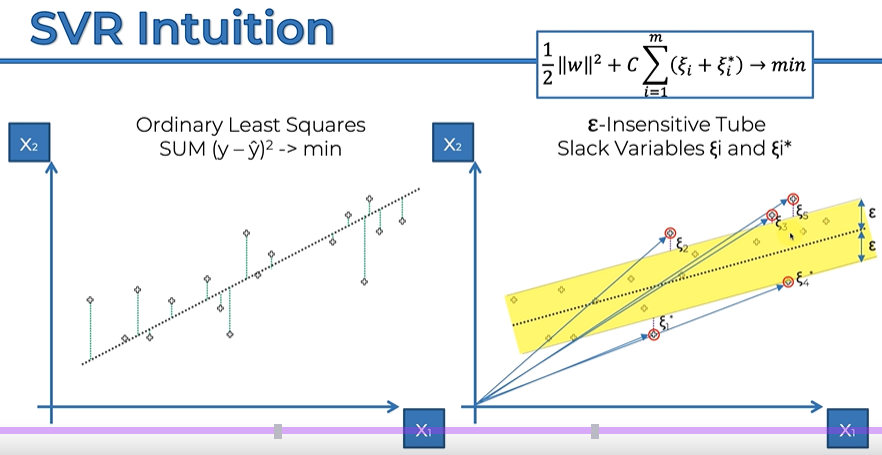

### What is **SVR** (Support Vector Regression)?

**SVR** stands for **Support Vector Regression**, which is the **regression version of SVM (Support Vector Machine)**. While SVM is used for classification, **SVR is used for predicting continuous values**.

---

### Key Idea Behind SVR

SVR tries to **fit the best line (or hyperplane) within a threshold margin** such that most of the data points lie within a tube (ε-insensitive zone) around the line.

Instead of minimizing just the error (like in linear regression), SVR:

* Allows **some flexibility** (slack) within a margin of tolerance `ε`.
* Penalizes only those predictions **outside** this margin.

---

### SVR Objective Function

The goal is to find a function $f(x)$ that has at most $\epsilon$ deviation from the actual target $y$, and at the same time is as flat as possible.

Minimize:

$$
\frac{1}{2} ||w||^2 + C \sum_{i=1}^{n} (\xi_i + \xi_i^*)
$$

Subject to:

$$
\begin{cases}
y_i - w^Tx_i - b \leq \epsilon + \xi_i \\
w^Tx_i + b - y_i \leq \epsilon + \xi_i^* \\
\xi_i, \xi_i^* \geq 0
\end{cases}
$$

* `||w||²` → keep the model flat (regularization).
* `C` → regularization parameter (trade-off between flatness and tolerance).
* `ε` → the tolerance (margin) for error.
* `ξ` and `ξ*` → slack variables for points outside ε-margin.

---

### Key Features

| Feature                | Description                                                                                    |
| ---------------------- | ---------------------------------------------------------------------------------------------- |
| **Epsilon margin (ε)** | Acceptable range of error – predictions within this range aren't penalized.                    |
| **Kernel trick**       | Allows SVR to model **non-linear** relationships using kernels (e.g., RBF, polynomial).        |
| **Support Vectors**    | Only data points **outside the ε-margin** influence the model – these are the support vectors. |
| **Regularization (C)** | Controls trade-off between smooth function and tolerance for error outside ε.                  |

---

### Example Use Cases

* Stock price prediction
* Temperature forecasting
* Real estate price prediction
* Demand forecasting

---

### In Python (using `scikit-learn`):

```python
from sklearn.svm import SVR

# Example SVR model with RBF kernel
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_train, y_train)
predictions = svr_model.predict(X_test)
```

---

### When to Use SVR?

* When you have **complex, non-linear** data.
* When you want a **robust regression model** that ignores small errors (within ε).
* When you want to avoid overfitting using **support vectors**.

### Importing the Libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [8]:
df = pd.read_csv('../datasets/Position_Salaries.csv')
print(df.tail())

         Position  Level   Salary
5  Region Manager      6   150000
6         Partner      7   200000
7  Senior Partner      8   300000
8         C-level      9   500000
9             CEO     10  1000000


In [9]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
print(X)
print('\n')
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [10]:
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


### Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
print(X)
print('\n')
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


### Training the SVR model on the whole dataset

In [14]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') # Radial Basis Function
regressor.fit(X, y.ravel())

SVR()

### Predict a new result

In [16]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

### Visualisng the SVR Results

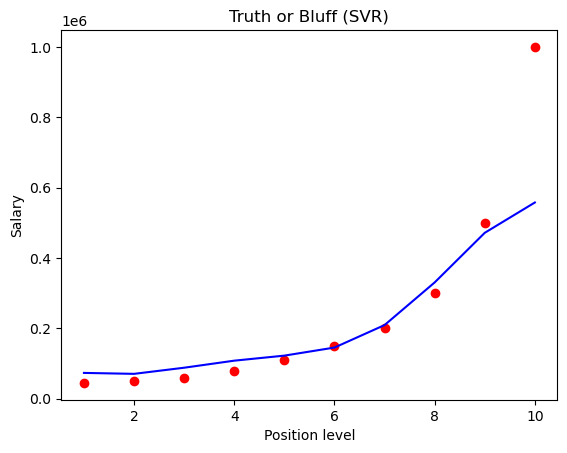

In [18]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### Evaluating the performance metrics

In [20]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
y_pred = regressor.predict(X)

# Evaluate performance metrics on scaled data
print("SVR Performance Metrics (Scaled Data):")
print("R2 Score:", r2_score(y, y_pred))
print("MAE:", mean_absolute_error(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

# Evaluate performance metrics on original (unscaled) data
y_true_unscaled = sc_y.inverse_transform(y.reshape(-1, 1)).ravel()
y_pred_unscaled = sc_y.inverse_transform(y_pred.reshape(-1, 1)).ravel()

print("\nSVR Performance Metrics (Original Scale):")
print("R2 Score:", r2_score(y_true_unscaled, y_pred_unscaled))
print("MAE:", mean_absolute_error(y_true_unscaled, y_pred_unscaled))
print("MSE:", mean_squared_error(y_true_unscaled, y_pred_unscaled))
print("RMSE:", np.sqrt(mean_squared_error(y_true_unscaled, y_pred_unscaled)))

SVR Performance Metrics (Scaled Data):
R2 Score: 0.7516001070620798
MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411

SVR Performance Metrics (Original Scale):
R2 Score: 0.7516001070620798
MAE: 63332.39208968966
MSE: 20036494264.131752
RMSE: 141550.32413997417
